In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
import datetime
import pandas_datareader.data as web
from datetime import datetime, timedelta
import yfinance as yf

In [2]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [3]:
formatted_date = today.strftime('%Y-%m-%d')

In [4]:
formatted_date

'2023-10-15'

In [5]:
end_date = datetime.now()

# Calculate the start date as one year ago from the end date
start_date = end_date - timedelta(days=365)

# Convert the start_date and end_date to '%Y-%m-%d' format strings
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

In [6]:
company_list = ['AAPL', 'GOOGL', 'MSFT', 'TWTR']

In [7]:
for company in company_list:
    df = yf.download(company, start=start_date_str, end=end_date_str)
    globals()[company] = df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')


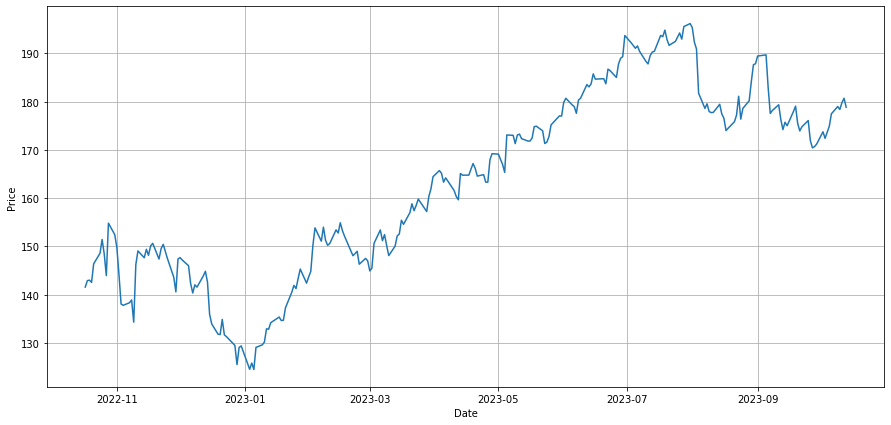

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(AAPL['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<Axes: xlabel='Date'>

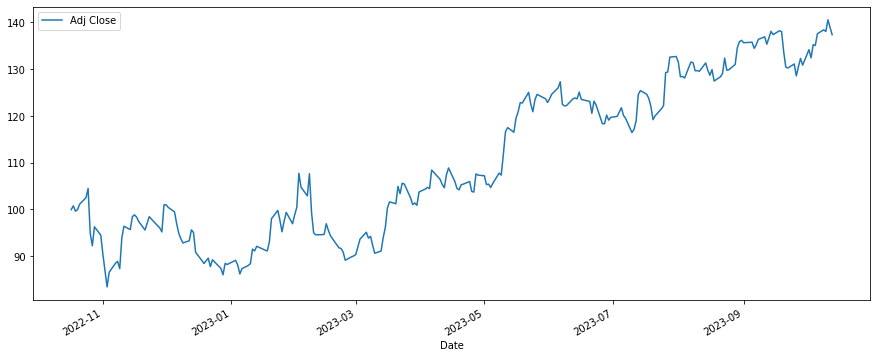

In [9]:
GOOGL['Adj Close'].plot(legend=True, figsize=(15, 6))

In [10]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    GOOGL[ma_str] = GOOGL['Adj Close'].rolling(ma).mean()
    AAPL[ma_str] = AAPL['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()


In [11]:
GOOGL

,Open,High,Low,Close,Adj Close,Volume,MA: 10,MA: 20,MA: 30
Date,,,,,,,,,
2022-10-17,98.860001,100.930000,98.830002,99.970001,99.970001,28419200,NaN,NaN,NaN
2022-10-18,103.129997,103.470001,99.970001,100.769997,100.769997,24060700,NaN,NaN,NaN
2022-10-19,100.010002,101.019997,98.919998,99.629997,99.629997,23811100,NaN,NaN,NaN
2022-10-20,100.000000,102.320000,99.389999,99.970001,99.970001,25323200,NaN,NaN,NaN
2022-10-21,97.849998,101.309998,97.720001,101.129997,101.129997,32458700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-10-09,136.940002,138.940002,135.610001,138.419998,138.419998,19278100,133.519000,134.226501,134.553668
2023-10-10,138.500000,139.720001,137.330002,138.059998,138.059998,27786600,134.467999,134.362501,134.788668
2023-10-11,138.580002,141.110001,138.580002,140.550003,140.550003,25884300,135.469000,134.554501,134.988001


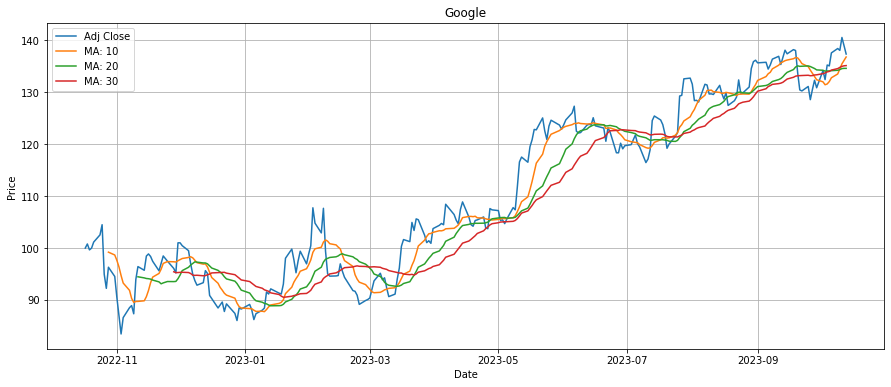

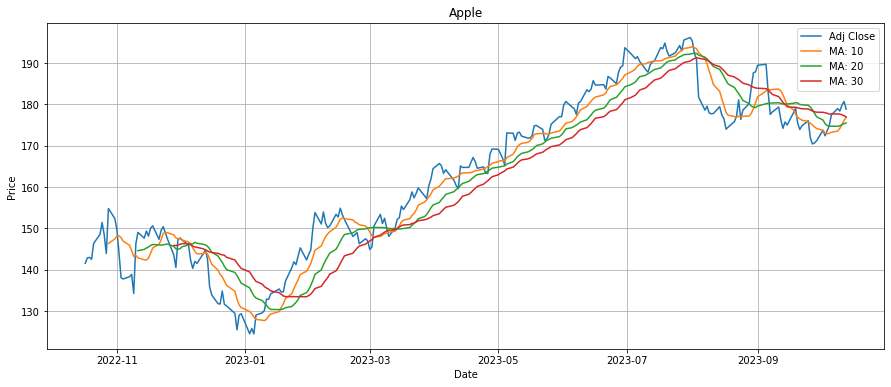

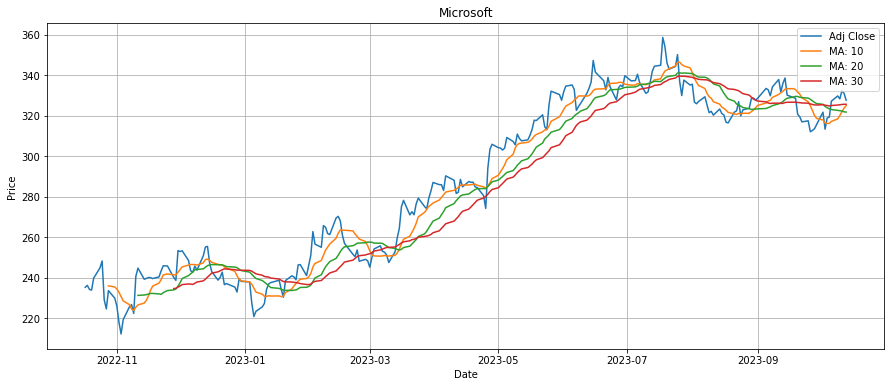

In [12]:
def plot_graphic(data, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(data['Adj Close'])
    plt.plot(data['MA: 10'])
    plt.plot(data['MA: 20'])
    plt.plot(data['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close', 'MA: 10', 'MA: 20', 'MA: 30'))
    plt.grid()
    plt.show()

# Assuming you have the data stored in GOOGL, AAPL, and MSFT variables
# Call the function for each company like this:

plot_graphic(GOOGL, 'Google')
plot_graphic(AAPL, 'Apple')
plot_graphic(MSFT, 'Microsoft')

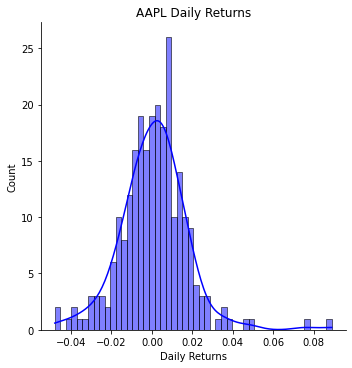

In [17]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()
sns.displot(AAPL['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
plt.title('AAPL Daily Returns') 
plt.show()

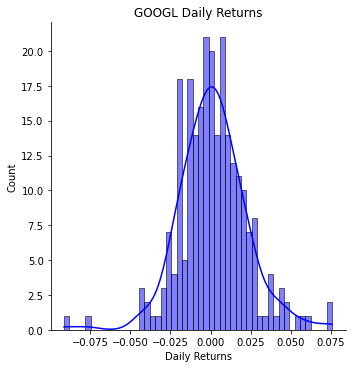

In [19]:
GOOGL['Daily Returns'] = GOOGL['Adj Close'].pct_change()
sns.displot(GOOGL['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
plt.title('GOOGL Daily Returns') 
plt.show()

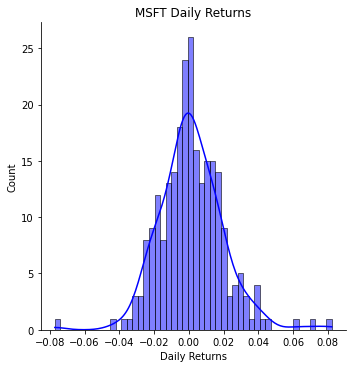

In [20]:
MSFT['Daily Returns'] = MSFT['Adj Close'].pct_change()
sns.displot(MSFT['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
plt.title('MSFT Daily Returns') 
plt.show()

In [31]:
company_list = ['AAPL', 'GOOGL', 'MSFT']
company_data = {}
for company in company_list:
    df = yf.download(company, start=start_date_str, end=end_date_str)
    company_data[company] = df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [32]:
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

,AAPL,GOOGL,MSFT
0,NaN,NaN,NaN
1,0.009409,0.008002,0.004084
2,0.000765,-0.011313,-0.008470
3,-0.003267,0.003413,-0.001395
4,0.027059,0.011603,0.025280


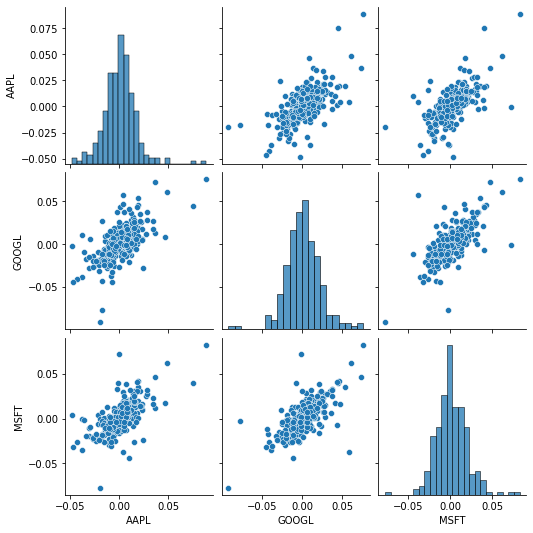

In [33]:
sns.pairplot(stock_returns.dropna())

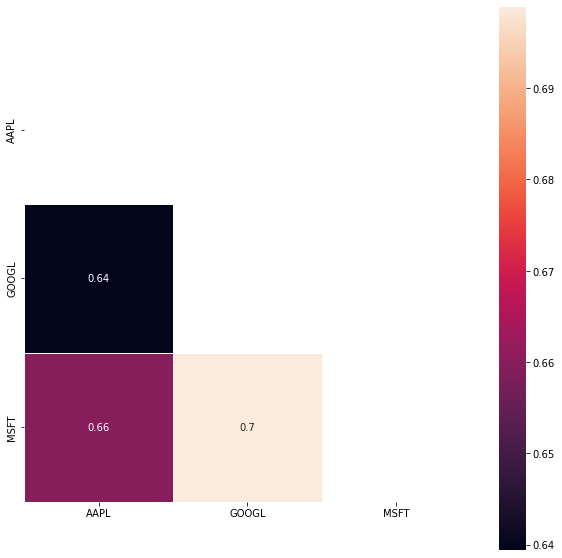

In [34]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [35]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

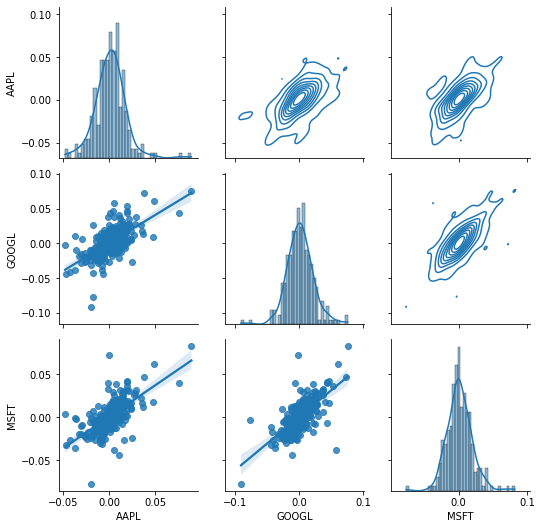

In [36]:
draw_jointplot(stock_returns)

In [37]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

AAPL     0.001078
GOOGL    0.001500
MSFT     0.001504
dtype: float64
           AAPL     GOOGL      MSFT
AAPL   0.000282  0.000227  0.000206
GOOGL  0.000227  0.000449  0.000276
MSFT   0.000206  0.000276  0.000346


In [38]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [39]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)

In [40]:
def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [41]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

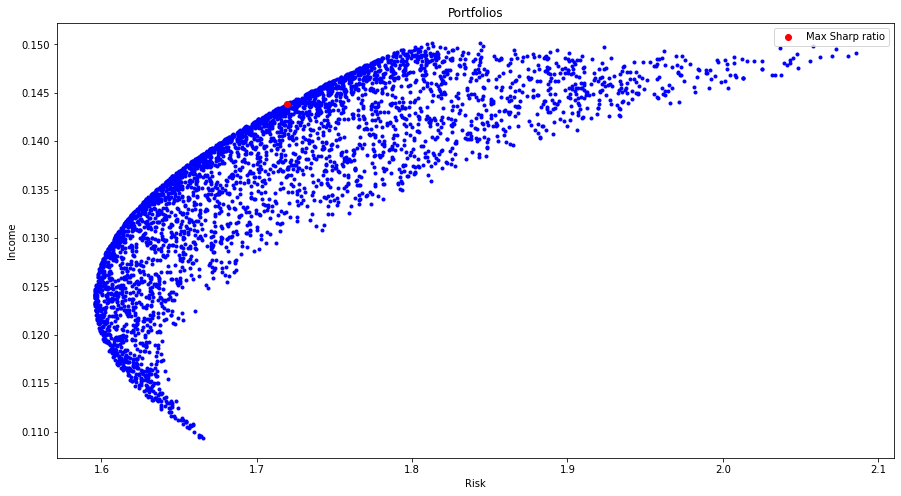

In [42]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [43]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

AAPL : 0.15180166756349675
GOOGL : 0.23955602889898062
MSFT : 0.6086423035375226


In [44]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [45]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [46]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800,173.549002,174.704002,177.702667,0.008451
2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000,174.192001,174.808501,177.642667,-0.003352
2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100,175.129002,175.088001,177.498667,0.007904
2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56743100,176.131003,175.336501,177.267334,0.005061
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100,176.895003,175.528502,176.966668,-0.010293


Text(0.5, 1.0, 'Monte Carlo analysis for APPLE')

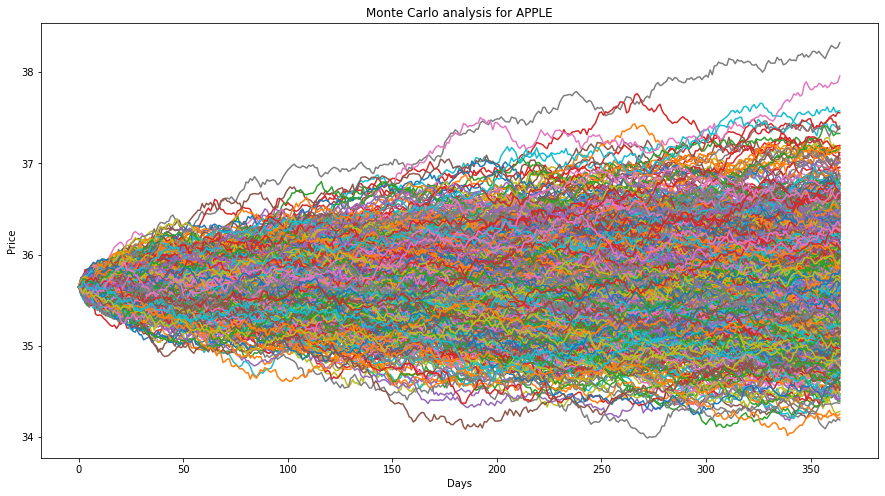

In [49]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AAPL'], sigma['AAPL'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for APPLE')

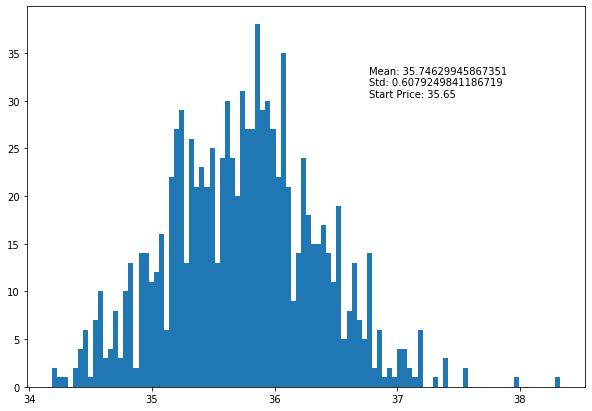

In [50]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for GOOGLE')

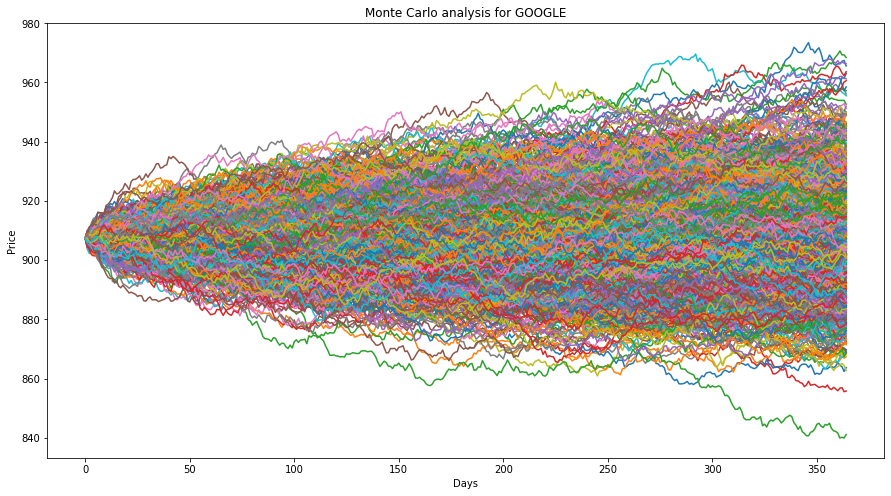

In [52]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['GOOGL'], sigma['GOOGL'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for GOOGLE')

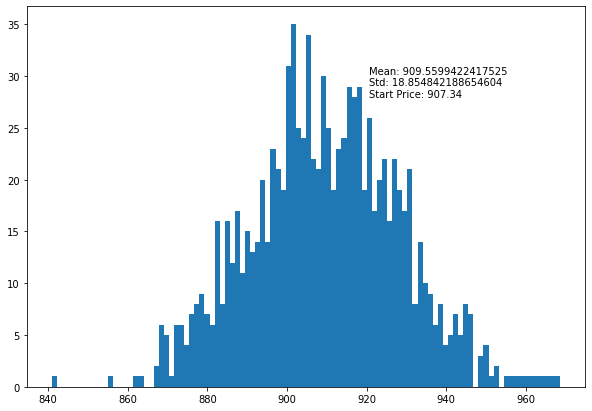

In [53]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for Microsft')

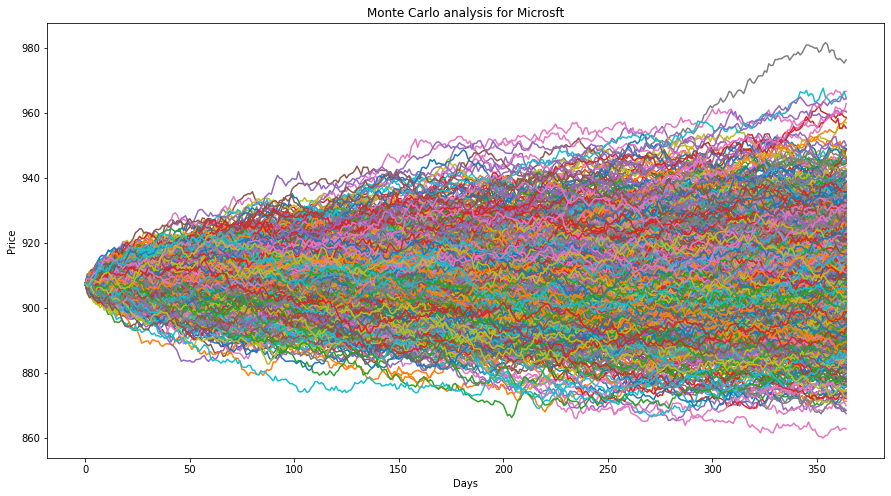

In [54]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsft')

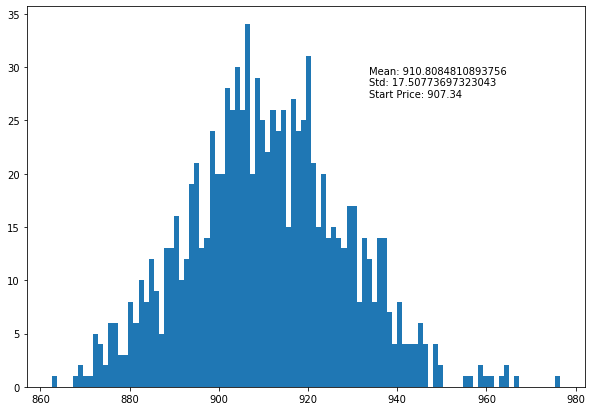

In [55]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()